# Project 2

# Used Vehicle Price Prediction

## Introduction

- 1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model dataset from Kaggle: [data](https://www.kaggle.com/jpayne/852k-used-car-listings)
- Each observation represents the price of an used car

In [1]:
%matplotlib inline
import pandas as pd

In [2]:
data = pd.read_csv('dataTrain_carListings.zip')

In [3]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [4]:
data['Make'].value_counts()

Ford             78627
Chevrolet        72900
Toyota           57485
Honda            41490
Jeep             30413
GMC              25963
Kia              20347
Dodge            20178
Hyundai          18856
Lexus            17127
BMW              15367
Volkswagen       13876
Nissan           13168
Chrysler         11402
Mercedes-Benz     9497
Subaru            8499
Cadillac          6738
Buick             6132
Ram               4520
MINI              3497
Land              3397
INFINITI          3039
Acura             2990
Mazda             2952
Lincoln           2168
Volvo             2159
Audi              1792
Mitsubishi        1623
Porsche           1200
Scion              800
Jaguar             422
Pontiac            397
FIAT               338
Mercury            325
Tesla              187
Bentley             73
Suzuki              49
Freightliner         7
Name: Make, dtype: int64

In [5]:
data_make = data['Make']

make1 = []

for i in data_make:
    if i == 'Ford':
        make1.append('Ford')
    elif i == 'Chevrolet':
        make1.append('Chevrolet')
    elif i == 'Toyota':
        make1.append('Toyota')
    elif i == 'Honda':
        make1.append('Honda')
    elif i == 'Jeep':
        make1.append('Jeep')
    else:
        make1.append('Others')
    

In [6]:
data['make1'] = make1
data

,Price,Year,Mileage,State,Make,Model,make1
0,21490,2014,31909,MD,Nissan,MuranoAWD,Others
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe,Chevrolet
2,20925,2016,24633,SC,Hyundai,Santa,Others
3,14500,2012,84026,OK,Jeep,Grand,Jeep
4,32488,2013,22816,TN,Jeep,Wrangler,Jeep
...,...,...,...,...,...,...,...
499995,16997,2013,40393,TX,BMW,1,Others
499996,11990,2012,91794,WA,Hyundai,Santa,Others
499997,49991,2014,39107,MS,Ford,Super,Ford
499998,21888,2010,62556,NH,Dodge,Ram,Others


In [7]:
data2 = data[['Model','make1']]

In [8]:
data2.sort_values(by = 'make1')

,Model,make1
499999,Suburban4WD,Chevrolet
375752,TraverseFWD,Chevrolet
198515,TraverseFWD,Chevrolet
375743,CamaroCoupe,Chevrolet
455799,Malibu,Chevrolet
...,...,...
436877,CamrySE,Toyota
351827,Corolla4dr,Toyota
436874,PriusTwo,Toyota
351828,Tundra,Toyota


In [9]:
pd.set_option('display.max_rows',10000)

In [10]:
data2.groupby(['make1','Model']).count()

Empty DataFrame
Columns: []
Index: [(Chevrolet, Avalanche2WD), (Chevrolet, Avalanche4WD), (Chevrolet, Camaro2dr), (Chevrolet, CamaroConvertible), (Chevrolet, CamaroCoupe), (Chevrolet, Cobalt2dr), (Chevrolet, Cobalt4dr), (Chevrolet, Colorado2WD), (Chevrolet, Colorado4WD), (Chevrolet, ColoradoCrew), (Chevrolet, ColoradoExtended), (Chevrolet, Corvette2dr), (Chevrolet, CorvetteConvertible), (Chevrolet, CorvetteCoupe), (Chevrolet, CruzeLT), (Chevrolet, CruzeSedan), (Chevrolet, EquinoxAWD), (Chevrolet, EquinoxFWD), (Chevrolet, Express), (Chevrolet, Impala4dr), (Chevrolet, ImpalaLS), (Chevrolet, ImpalaLT), (Chevrolet, Malibu), (Chevrolet, Malibu1LT), (Chevrolet, Malibu4dr), (Chevrolet, MalibuLS), (Chevrolet, MalibuLT), (Chevrolet, Monte), (Chevrolet, New), (Chevrolet, Silverado), (Chevrolet, SonicHatch), (Chevrolet, SonicSedan), (Chevrolet, Suburban2WD), (Chevrolet, Suburban4WD), (Chevrolet, Suburban4dr), (Chevrolet, Tahoe2WD), (Chevrolet, Tahoe4WD), (Chevrolet, Tahoe4dr), (Chevrolet, TahoeLS), (Chevrolet, TahoeLT), (Chevrolet, TraverseAWD), (Chevrolet, TraverseFWD), (Ford, Econoline), (Ford, EdgeLimited), (Ford, EdgeSE), (Ford, EdgeSEL), (Ford, EdgeSport), (Ford, Escape4WD), (Ford, Escape4dr), (Ford, EscapeFWD), (Ford, EscapeLImited), (Ford, EscapeLimited), (Ford, EscapeS), (Ford, EscapeSE), (Ford, EscapeXLT), (Ford, Excursion137"), (Ford, Expedition), (Ford, Expedition2WD), (Ford, Expedition4WD), (Ford, ExpeditionLimited), (Ford, ExpeditionXLT), (Ford, Explorer), (Ford, Explorer4WD), (Ford, Explorer4dr), (Ford, ExplorerBase), (Ford, ExplorerEddie), (Ford, ExplorerFWD), (Ford, ExplorerLimited), (Ford, ExplorerXLT), (Ford, F-1502WD), (Ford, F-1504WD), (Ford, F-150FX2), (Ford, F-150FX4), (Ford, F-150King), (Ford, F-150Lariat), (Ford, F-150Limited), (Ford, F-150Platinum), (Ford, F-150STX), (Ford, F-150SuperCrew), (Ford, F-150XL), (Ford, F-150XLT), (Ford, F-250King), (Ford, F-250Lariat), (Ford, F-250XL), (Ford, F-250XLT), (Ford, F-350King), (Ford, F-350Lariat), (Ford, F-350XL), (Ford, F-350XLT), (Ford, FiestaS), (Ford, FiestaSE), (Ford, FlexLimited), (Ford, FlexSE), (Ford, FlexSEL), (Ford, Focus4dr), (Ford, Focus5dr), (Ford, FocusS), (Ford, FocusSE), (Ford, FocusSEL), (Ford, FocusST), ...]

In [11]:
data['Model'].value_counts()

Silverado              22562
Grand                  15382
Sierra                 10423
Accord                  9145
F-1504WD                8379
Wrangler                7334
Civic                   7205
3                       6885
Jetta                   6400
Santa                   6229
FusionSE                6178
EquinoxFWD              5849
CamrySE                 4976
Super                   4878
CorollaLE               4719
MalibuLT                4553
F-150XLT                3986
Town                    3941
Ram                     3685
CamaroCoupe             3592
Cooper                  3497
SorentoLX               3431
ExplorerXLT             3398
Rover                   3397
OptimaLX                3357
EscapeSE                3357
5                       3314
Tundra                  3310
RX                      3255
EquinoxAWD              3135
F-1502WD                3120
CamryLE                 3082
CR-VEX-L                3045
Passat4dr               2986
TerrainFWD    

In [12]:
data_model = data['Model']

model1 = []

for i in data_model:
    if i == 'Silverado':
        model1.append('Silverado')
    elif i == 'Grand':
        model1.append('Grand')
    elif i == 'Sierra':
        model1.append('Sierra')
    elif i == 'Accord':
        model1.append('Accord')
    elif i == 'F-1504WD':
        model1.append('F-1504WD')
    elif i == 'Wrangler':
        model1.append('Wrangler')
    elif i == 'Civic':
        model1.append('Civic')
    else:
        model1.append('Others')
  
    
        
        
    

In [13]:
data['model1'] = model1
data

,Price,Year,Mileage,State,Make,Model,make1,model1
0,21490,2014,31909,MD,Nissan,MuranoAWD,Others,Others
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe,Chevrolet,Others
2,20925,2016,24633,SC,Hyundai,Santa,Others,Others
3,14500,2012,84026,OK,Jeep,Grand,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler,Jeep,Wrangler
...,...,...,...,...,...,...,...,...
499995,16997,2013,40393,TX,BMW,1,Others,Others
499996,11990,2012,91794,WA,Hyundai,Santa,Others,Others
499997,49991,2014,39107,MS,Ford,Super,Ford,Others
499998,21888,2010,62556,NH,Dodge,Ram,Others,Others


In [14]:
data.shape

(500000, 8)

In [15]:
data['State'].isnull().sum()

0

In [16]:
data.Price.describe()

count    500000.000000
mean      21144.186304
std       10753.259704
min        5001.000000
25%       13499.000000
50%       18450.000000
75%       26998.000000
max       79999.000000
Name: Price, dtype: float64

In [17]:
data.dtypes

Price       int64
Year        int64
Mileage     int64
State      object
Make       object
Model      object
make1      object
model1     object
dtype: object

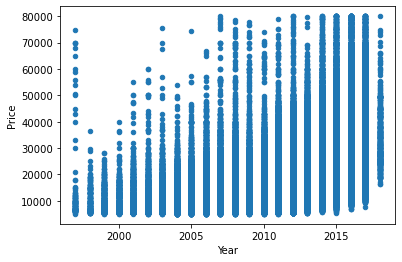

In [18]:
data.plot(kind='scatter', y='Price', x='Year')

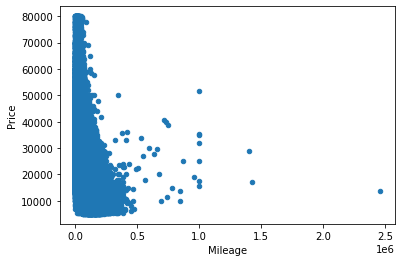

In [19]:
data.plot(kind='scatter', y='Price', x='Mileage')

In [20]:
data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model', 'make1',
       'model1'],
      dtype='object')

# Exercise P2.1 (50%)

Develop a machine learning model that predicts the price of the of car using as an input ['Year', 'Mileage', 'State', 'Make', 'Model']

#### Evaluation:
- 25% - Performance of the models using a manually implemented K-Fold (K=10) cross-validation
- 25% - Notebook explaining the process for selecting the best model. You must specify how the calibration of each of the parameters is done and how these change the performance of the model. It is expected that a clear comparison will be made of all implemented models.. Present the most relevant conslusions about the whole process. 


# Usando RandomForestRegressor

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [22]:
rfr = RandomForestRegressor(n_jobs=-1, n_estimators=100, max_depth=3)

In [23]:
y = data['Price']

In [24]:
y.shape

(500000,)

In [25]:
X = data[['Year', 'Mileage', 'State', 'make1', 'model1']]

In [26]:
X.shape

(500000, 5)

In [27]:
X1= pd.get_dummies(X,
                     columns = ['State', 'make1', 'model1'])

In [28]:
X1.shape

(500000, 67)

In [29]:
X1

,Year,Mileage,State_ AK,State_ AL,State_ AR,State_ AZ,State_ CA,State_ CO,State_ CT,State_ DC,...,make1_Others,make1_Toyota,model1_Accord,model1_Civic,model1_F-1504WD,model1_Grand,model1_Others,model1_Sierra,model1_Silverado,model1_Wrangler
0,2014,31909,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2016,25741,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2016,24633,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,2012,84026,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2013,22816,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2013,40393,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
499996,2012,91794,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
499997,2014,39107,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
499998,2010,62556,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.33, random_state=42)

In [31]:
rf_model = rfr.fit(X_train,y_train)

In [32]:
from sklearn.model_selection import KFold
import numpy as np

In [33]:
kf = KFold(n_splits=10)
kf.get_n_splits(X1)
print(kf)
KFold(n_splits=10, random_state=None, shuffle=False)

KFold(n_splits=10, random_state=None, shuffle=False)


KFold(n_splits=10, random_state=None, shuffle=False)

In [34]:
kf_X1 = kf.split(X1)
print(kf_X1)

<generator object _BaseKFold.split at 0x7ff00d470c80>


In [35]:
from sklearn import metrics

In [40]:


score = []

for train_index, test_index in kf.split(X1):
    from sklearn import metrics
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X1.iloc[train_index], X1.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rf_model = rfr.fit(X_train,y_train)
    rfr_pred = rfr.predict(X_test)
    metrics = metrics.mean_squared_error(rfr_pred, y_test)
    score.append(metrics)
root_rmse = np.sqrt(score)
root_rmse

TRAIN: [ 50000  50001  50002 ... 499997 499998 499999] TEST: [    0     1     2 ... 49997 49998 49999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [50000 50001 50002 ... 99997 99998 99999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [100000 100001 100002 ... 149997 149998 149999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [150000 150001 150002 ... 199997 199998 199999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [200000 200001 200002 ... 249997 249998 249999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [250000 250001 250002 ... 299997 299998 299999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [300000 300001 300002 ... 349997 349998 349999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [350000 350001 350002 ... 399997 399998 399999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [400000 400001 400002 ... 449997 449998 449999]
TRAIN: [     0      1      2 ..

array([9030.80080679, 8980.99301406, 9020.99388592, 9041.04434035,
       9001.94137641, 9122.85192902, 9061.50845359, 9013.11200871,
       9086.42493572, 8965.97665509])

In [41]:
rfr2 = RandomForestRegressor(n_jobs=-1, n_estimators=100, max_depth=10)

In [42]:
score2 = []

for train_index, test_index in kf.split(X1):
    from sklearn import metrics
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X1.iloc[train_index], X1.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rf2_model = rfr2.fit(X_train,y_train)
    rfr2_pred = rfr2.predict(X_test)
    metrics = metrics.mean_squared_error(rfr2_pred, y_test)
    score2.append(metrics)
root_rmse2 = np.sqrt(score2)
root_rmse2

TRAIN: [ 50000  50001  50002 ... 499997 499998 499999] TEST: [    0     1     2 ... 49997 49998 49999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [50000 50001 50002 ... 99997 99998 99999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [100000 100001 100002 ... 149997 149998 149999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [150000 150001 150002 ... 199997 199998 199999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [200000 200001 200002 ... 249997 249998 249999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [250000 250001 250002 ... 299997 299998 299999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [300000 300001 300002 ... 349997 349998 349999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [350000 350001 350002 ... 399997 399998 399999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [400000 400001 400002 ... 449997 449998 449999]
TRAIN: [     0      1      2 ..

array([8152.80373878, 8048.85513906, 8112.27631095, 8125.96020015,
       8078.35163281, 8185.86609228, 8129.86165676, 8090.30030224,
       8166.53724697, 8032.2488735 ])

# Usando Gradient Boosting

In [43]:
from sklearn.ensemble import GradientBoostingRegressor


In [44]:
clf = GradientBoostingRegressor(n_estimators = 100)
clf

GradientBoostingRegressor()

In [45]:
score3 = []

for train_index, test_index in kf.split(X1):
    from sklearn import metrics
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X1.iloc[train_index], X1.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf_model = clf.fit(X_train,y_train)
    clf_pred = clf.predict(X_test)
    metrics = metrics.mean_squared_error(clf_pred, y_test)
    score3.append(metrics)
root_rmse3 = np.sqrt(score3)
root_rmse3

TRAIN: [ 50000  50001  50002 ... 499997 499998 499999] TEST: [    0     1     2 ... 49997 49998 49999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [50000 50001 50002 ... 99997 99998 99999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [100000 100001 100002 ... 149997 149998 149999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [150000 150001 150002 ... 199997 199998 199999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [200000 200001 200002 ... 249997 249998 249999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [250000 250001 250002 ... 299997 299998 299999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [300000 300001 300002 ... 349997 349998 349999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [350000 350001 350002 ... 399997 399998 399999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [400000 400001 400002 ... 449997 449998 449999]
TRAIN: [     0      1      2 ..

array([8282.27755113, 8173.46445582, 8234.96515377, 8250.42309616,
       8194.78947696, 8306.43700243, 8242.03326276, 8206.5289264 ,
       8282.18752358, 8147.1614329 ])

In [46]:
clf2 = GradientBoostingRegressor(n_estimators = 100, max_depth = 3, max_features=20)
clf2

GradientBoostingRegressor(max_features=20)

In [47]:
score4 = []

for train_index, test_index in kf.split(X1):
    from sklearn import metrics
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X1.iloc[train_index], X1.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf2_model = clf2.fit(X_train,y_train)
    clf2_pred = clf2.predict(X_test)
    metrics = metrics.mean_squared_error(clf2_pred, y_test)
    score4.append(metrics)
root_rmse4 = np.sqrt(score4)
root_rmse4

TRAIN: [ 50000  50001  50002 ... 499997 499998 499999] TEST: [    0     1     2 ... 49997 49998 49999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [50000 50001 50002 ... 99997 99998 99999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [100000 100001 100002 ... 149997 149998 149999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [150000 150001 150002 ... 199997 199998 199999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [200000 200001 200002 ... 249997 249998 249999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [250000 250001 250002 ... 299997 299998 299999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [300000 300001 300002 ... 349997 349998 349999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [350000 350001 350002 ... 399997 399998 399999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [400000 400001 400002 ... 449997 449998 449999]
TRAIN: [     0      1      2 ..

array([8321.61466511, 8238.4774861 , 8284.19566782, 8291.51240105,
       8242.35656049, 8379.36093954, 8320.05943075, 8257.15643049,
       8332.7537421 , 8204.47469461])

# Extrayendo el mejor modelo

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.33, random_state=42)

In [60]:
rfr2_model_max = rfr2.fit(X_train,y_train)

In [62]:
y_pred = rfr2_model_max.predict(X_test)
y_pred 

array([22775.76825991, 25085.79287965, 23738.64501268, ...,
       15891.54930729, 24919.70499751, 14267.67158399])

In [63]:
from sklearn import metrics
metrics.r2_score(y_pred, y_test)

-0.338057441747627

In [64]:
import pickle

In [67]:
pickle.dump(rfr2_model_max, open('rfr2_model_max_final.pkl', 'wb'))

# Analisis de resultados

Para este ejercicio se crearon 4 modelos de regresión en búsqueda del mejor desempeño al momento de predecir la variable precio. A cada uno de los 4 modelos se le realizo un proceso de Tuning en sus hiperparametros buscando obtener el resultado en el rmse como medida comparativa dentro de un proceso de KFOLD cross validation. El proceso de tuning de cada uno de los modelos se presenta a continuación:


rfr (RnadomForestRegressor): Para este modelo se realizo un proceso de tuning en donde se establecieron 100 estimadores y una longitud de profundidad máxima de 3 niveles en el árbol de decisión. En este ejercicio particular se quiso determinar si un árbol con profundidad máxima muy limitada podría tener un resultado comparativamente bueno con uno de mayor profundidad. Este ejercicio se planteo en aras de intentar encontrar un modelo con menos requerimiento de maquina, pero desafortunadamente fue el que tuvo el peor desempeño de los cuatros modelos. Adicionalmente se estableció n_jobs = -1 buscando optimizar el rendimiento del procesador en la maquina.


rfr2 (RnadomForestRegressor): ara este modelo se realizo un proceso de tuning en donde se establecieron 100 estimadores y una longitud de profundidad máxima de 10 niveles, en búsqueda de un mejor rendimiento que el modelo rfr anterior. Efectivamente aumentar el nivel máximo de nivel de profundidad afecta significativamente el desempeño del modelo, pasando de un rmse del aproximadamente 9000 a uno de aproximadamente 8050. Este cambio manteniendo el resto de hiperparametros del modelo frf anterior fue suficiente para llevar al modelo rfr2 a tener el mejor desempeño entre los 4 modelos realizados. 


clf (GradientBoostingRegressor): En Este modelo de GBOOST optamos por solo configurar el hiperparametro de estimadores a 100, buscando tener un nivel muy básico de tuning que nos mostrar la capacidad del estimador contra los modelos anteriores de Random Forest. Este ejercicio fue muy interésate ya que a pesar de no contar con un gran numero de hiperparametros customizados, el resultado del rmse resulto ser mejor que el modelo rfr y ligeramente peor que el modelo rfr2. Este resultado nos muestra la capacidad que tienen los GBOOST a la hora de generar modelos con alta desempeño.


clf2 (GradientBoostingRegressor): En este modelo se realizaron dos procesos de tuning, lo primero fue establecer el máximo de profundidad de los arboles a 3 seguido de es limitar el máximo de features a 20. El tuning en la profundidad se estableció por las mismas razones que en el modelo rfr (probar desempeño con profundidad limitada) mientras que la decisión de limitar los features a 20 nació de la búsqueda en literatura relacionado, la cual aconseja correr el modelo con un 30% - 40% del total de features del modelo para mayor desempeño. El resultado fue un poco decepcionante ya que el rmse del modelo fue peor que el del modelo clf por un margen muy bajo. 

# Exercise P2.2 (50%)

Create an API of the model.

Example:
![](https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/img015.PNG)

#### Evaluation:
- 40% - API hosted on a cloud service
- 10% - Show screenshots of the model doing the predictions on the local machine
